# Imports

In [3]:
from keras.datasets import mnist
import keras

import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'keras'

# Dataset

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


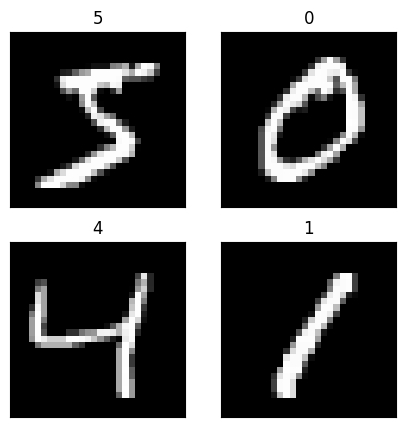

In [13]:
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Normalization

In [39]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train_norm, X_test_norm = X_train / 255.0, X_test / 255.0

In [40]:
print(X_train_norm.shape, y_train.shape)
print(X_test_norm.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


# Model Training

In [42]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(16, (3,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,866 (413.54 KB)

 Trainable params: 105,866 (413.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
h = model.fit(X_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0649 - val_accuracy: 0.9846 - val_loss: 0.0485
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9878 - loss: 0.0381 - val_accuracy: 0.9858 - val_loss: 0.0418
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.9890 - val_loss: 0.0370
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0215 - val_accuracy: 0.9867 - val_loss: 0.0442
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9887 - val_loss: 0.0424
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.9875 - val_loss: 0.0462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9870 - val_loss: 0.0510
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0098 - 

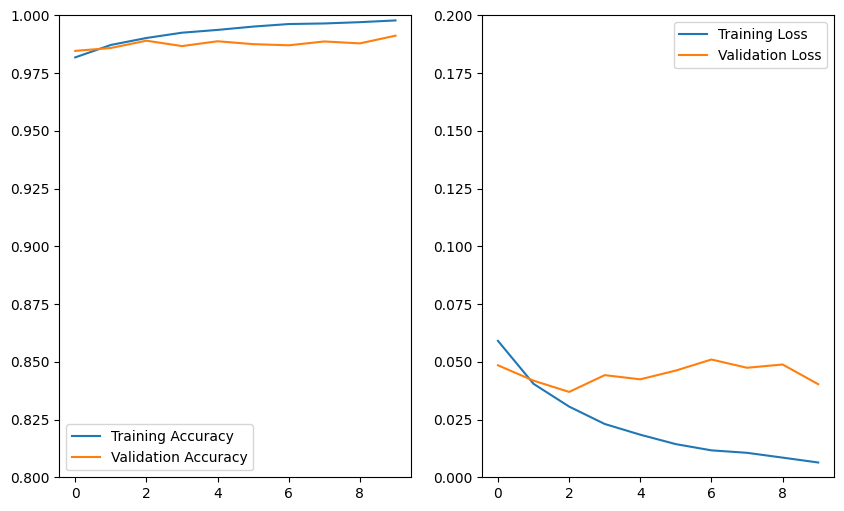

In [51]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.ylim([0.8, 1])

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylim([0, 0.2])
plt.show()

# Test Model

In [52]:
model.evaluate(X_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0467


[0.035678211599588394, 0.9918000102043152]

In [64]:
preds = model.predict(X_test_norm)
preds[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([8.5685804e-22, 4.6183294e-15, 1.9625487e-15, 5.6301020e-13,
       3.6081696e-20, 1.5257990e-18, 4.0754908e-30, 1.0000000e+00,
       6.8782327e-19, 2.3397920e-10], dtype=float32)

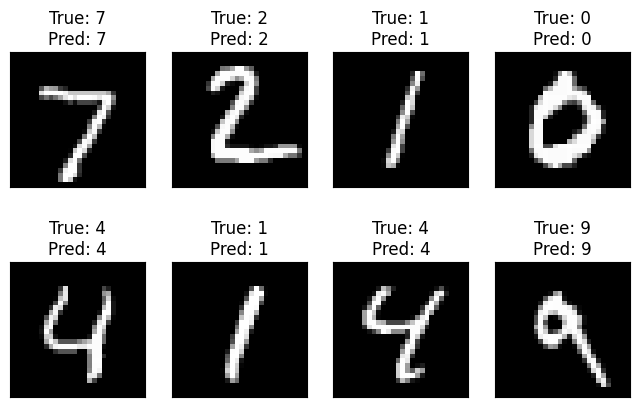

In [65]:
plt.figure(figsize=(8,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {np.argmax(preds[i])}")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Export Model

In [67]:
model.save('digit_model.keras')

# Test Model

In [98]:
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [131]:
input_digit = 0

Text(0.5, 1.0, '(1600, 1200, 3)')

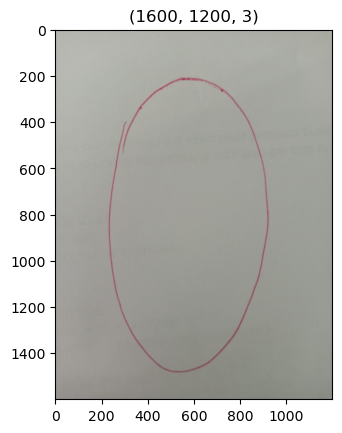

In [132]:
img = Image.open(f'data/{input_digit}.png').convert('RGB')
img = np.array(img)
plt.imshow(img)
plt.title(img.shape)

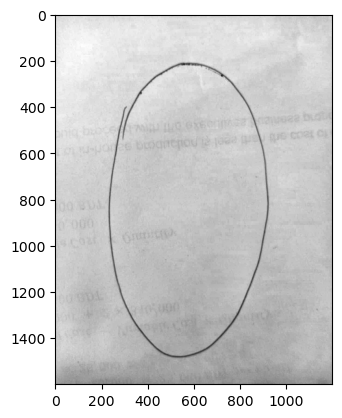

In [133]:
gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)
plt.imshow(gray, cmap='gray')

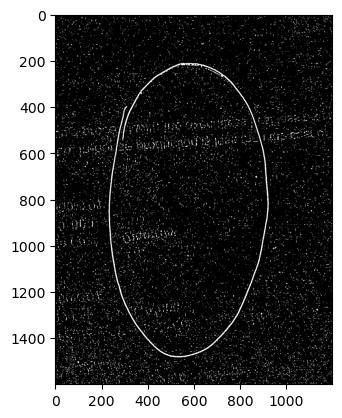

In [134]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

thresh = cv2.adaptiveThreshold(
    blur,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    2
)
plt.imshow(thresh, cmap='gray')

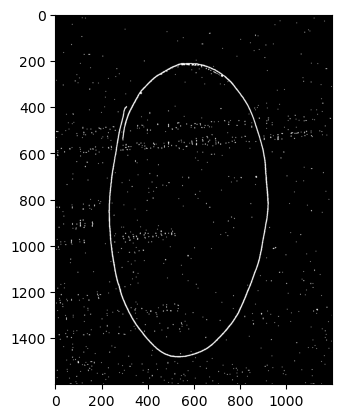

In [135]:
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh, cmap='gray')

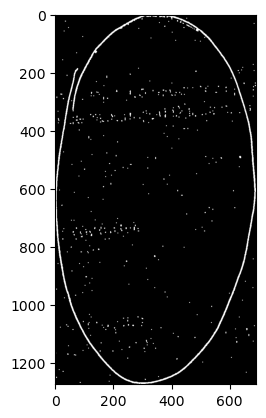

In [136]:
def preprocess_roi(thresh):
    h_img, w_img = thresh.shape

    contours, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    valid_contours = []

    for c in contours:
        area = cv2.contourArea(c)
        if area < 300:
            continue

        x, y, w, h = cv2.boundingRect(c)

        # reject contours touching border
        if x == 0 or y == 0 or x+w == w_img or y+h == h_img:
            continue

        # reject huge contours (likely paper/background)
        if area > 0.9 * h_img * w_img:
            continue

        valid_contours.append(c)

    if not valid_contours:
        return None

    # NOW pick the digit
    c = max(valid_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    digit = thresh[y:y+h, x:x+w]
    return digit

digit_bin = preprocess_roi(thresh)
digit_bin.shape
plt.imshow(digit_bin, cmap='gray')


digit_crop shape: (1273, 692)


Text(0.5, 1.0, 'Cropped digit (tight)')

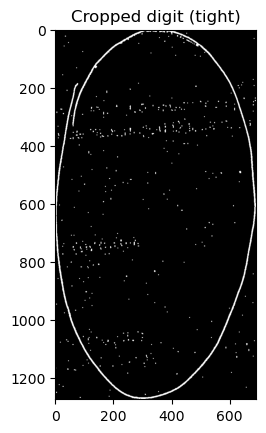

In [137]:
ys, xs = np.where(digit_bin > 0)

digit_crop = digit_bin[
    ys.min():ys.max()+1,
    xs.min():xs.max()+1
]

print("digit_crop shape:", digit_crop.shape)
plt.imshow(digit_crop, cmap='gray')
plt.title("Cropped digit (tight)")

Text(0.5, 1.0, 'Dilated digit')

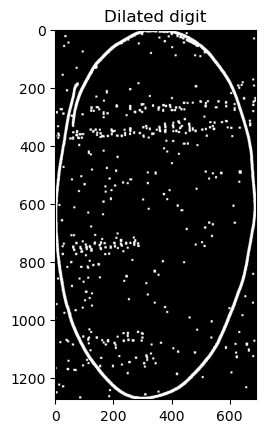

In [ ]:
kernel = np.ones((2,2), np.uint8)
digit_crop = cv2.dilate(digit_crop, kernel, iterations=1)
plt.imshow(digit_crop, cmap='gray')
plt.title("Dilated digit")

digit_resized shape: (20, 10)


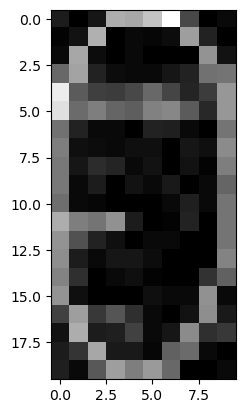

In [170]:
h, w = digit_crop.shape
scale = 20.0 / max(h, w)

new_h = int(h * scale)
new_w = int(w * scale)

digit_resized = cv2.resize(
    digit_crop,
    (new_w, new_h),
    interpolation=cv2.INTER_AREA
)

print("digit_resized shape:", digit_resized.shape)
plt.imshow(digit_resized, cmap='gray')

Text(0.5, 1.0, 'Thresholded digit')

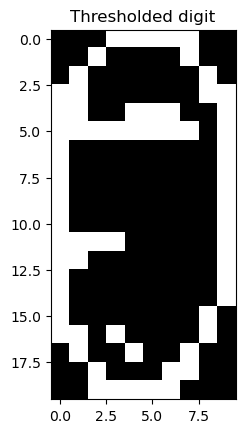

In [171]:
_, digit_resized = cv2.threshold(
    digit_resized, 20, 255, cv2.THRESH_BINARY
)
plt.imshow(digit_resized, cmap='gray')
plt.title("Thresholded digit")

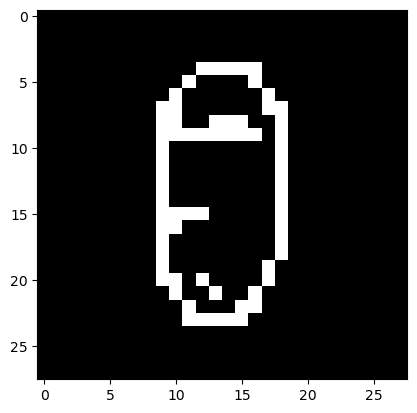

In [172]:
canvas = np.zeros((28, 28), dtype=np.uint8)

y_off = (28 - digit_resized.shape[0]) // 2
x_off = (28 - digit_resized.shape[1]) // 2

canvas[
    y_off:y_off+digit_resized.shape[0],
    x_off:x_off+digit_resized.shape[1]
] = digit_resized
plt.imshow(canvas, cmap='gray')


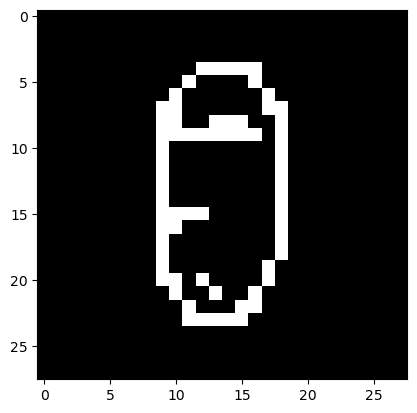

In [173]:
plt.imshow(canvas, cmap='gray')

In [174]:
loaded_model = keras.models.load_model('digit_model.keras')
digit_input = canvas.reshape(1, 28, 28, 1) / 255.0
pred = loaded_model.predict(digit_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


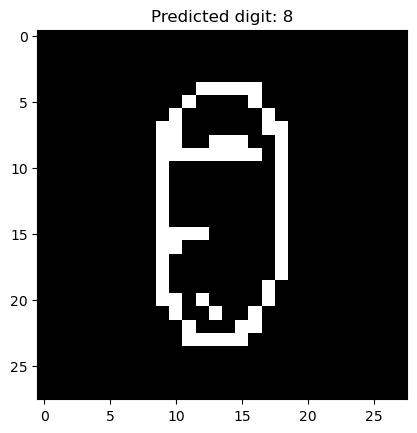

In [175]:
plt.imshow(canvas, cmap='gray')
plt.title(f"Predicted digit: {np.argmax(pred)}")
plt.show()